# Use SARIMA (Seasonal Autoregressive Integrated Moving Average) to Predict Revenue 

In this project, I created a Python notebook for predicting financial revenue of Bank using Auto Arima statistical method for time series forecasting as we take into account the past values to predict the future values of our bank revenues.

- p (past values used for forecasting the next value)

- q (past forecast errors used to predict the future values)

- d (order of differencing)


## Understanding the Problem Statement

Our focus is to do the technical analysis by analyzing the company’s future profitability on the basis of its current business financial performance by reading the charts and using statistical figures to identify the trends. 



## Data Sources:
* revenue_2009_2016.csv :  Processed data as an output from the data-preparation. Notebook available [here.](https://github.com/CFerraren/PyBank/blob/master/1-Data_Prep.ipynb)




### Task is to create a Python script that analyzes the records to calculate each of the following:

- Use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. 

- Split our data into train and validation sets to verify our predictions.


- Plot results.

### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

### Import Libraries

In [1]:
#import packages
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import itertools
import sklearn.preprocessing as preproc

#to plot within the notebook
import matplotlib.pyplot as plt
%matplotlib inline

#use seaborn to prettify the plots
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

#display pd typeformat
pd.set_option('display.float_format', '{:,.0f}'.format)

In [2]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [3]:
#directory and filename
dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

#### Load and index with Time-series

In [4]:
#load csv into dataframe and print the head
#parse the date colum to datetime format
#set 'Date' column to index
data = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')

In [5]:
df = data.copy()

In [6]:
df.describe().T

count    mean     std        min     25%     50%       75%       max
Revenue     86 650,527 680,460 -1,063,151 279,551 686,900 1,118,162 2,211,086

#### Distribtution

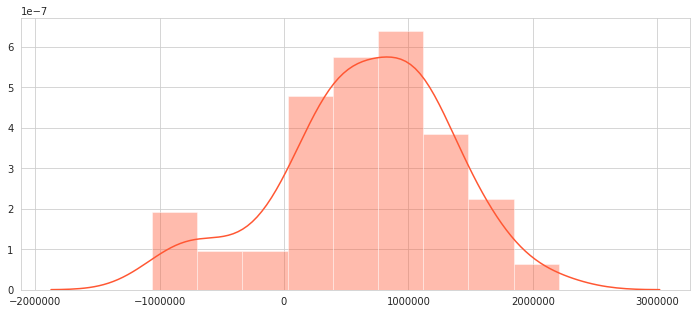

In [7]:
#plot the distribution
ax=sns.distplot(df, color='#FF5733')

### Visualizing Time-series Data

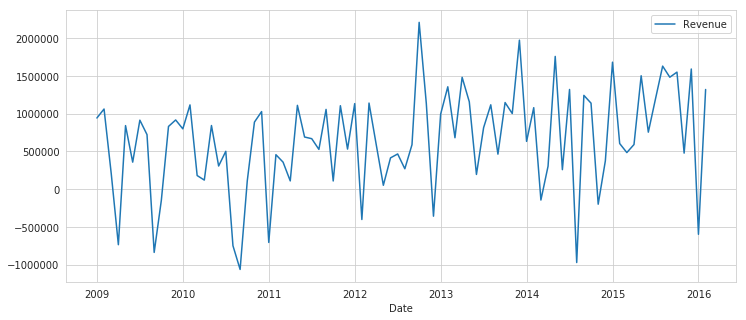

In [8]:
#plot
df.plot()
plt.show()

In [9]:
# The 'MS' string groups the data in buckets by end of the year
df1 = df['Revenue'].resample('Y').mean()
df[:5]

Revenue
Date                
2009-01-01   943,690
2009-02-01 1,062,565
2009-03-01   210,079
2009-04-01  -735,286
2009-05-01   842,933

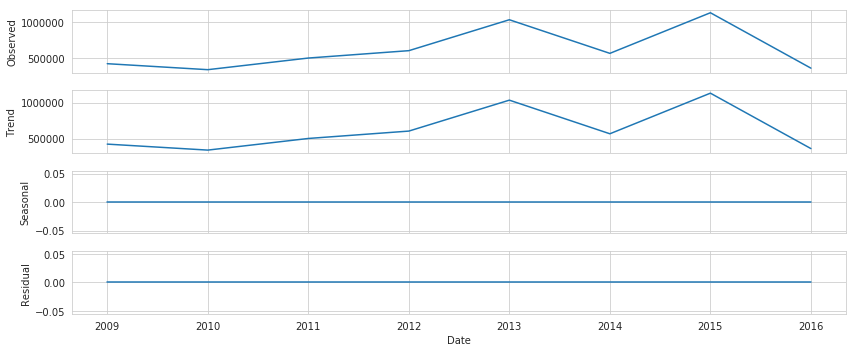

In [10]:
#visualized data with the resampled yearly averages of revenues
decomposition_mean = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition_mean.plot()
plt.show()

#### Transform

In [11]:
x = df[['Revenue']]

In [12]:
pt = preproc.PowerTransformer(method='yeo-johnson')
pt.fit(x)
df['revenue_transformed'] = pt.fit_transform(x)

In [13]:
df['inv'] = pt.inverse_transform(df[['revenue_transformed']])

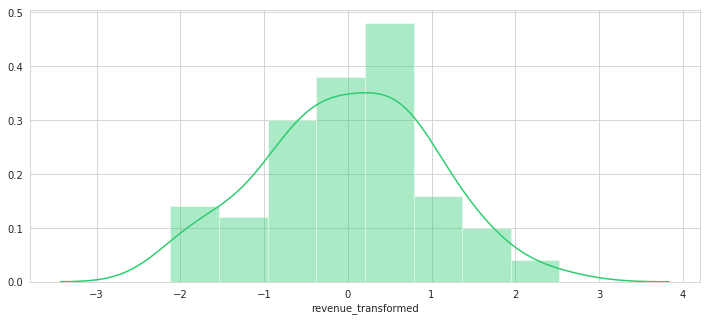

In [14]:
#plot the distribution
ax=sns.distplot(df.revenue_transformed, color='#2ecc71')

---

### The ARIMA Time Series Model

#### Manual Parameter Selection for the ARIMA Time Series Model

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [16]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['revenue_transformed'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:244.0397663097613
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:213.02221287118016
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:258.4502237059623
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:200.5489930351578
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:215.62153245113788
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:211.5115228438147
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:208.04627340391917
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:201.01156767061656
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:243.8127370326361
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:212.70138182069385
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:256.85216448088653
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:199.59490056992183
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:217.4785107395451
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:211.40028402618174
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:209.68881377038306
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:199.93993065374394
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:300.6061530931353
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:262.81211263808126

In [18]:
results.aic.min()

198.63546511304543

### Fitting an ARIMA Time Series Model

In [19]:
mod = sm.tsa.statespace.SARIMAX(df['revenue_transformed'],
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    636.813     -0.002      0.999   -1249.131    1247.131
ma.S.L12      -1.0002    266.977     -0.004      0.997    -524.266     522.265
sigma2         1.0564    747.932      0.001      0.999   -1464.864    1466.977


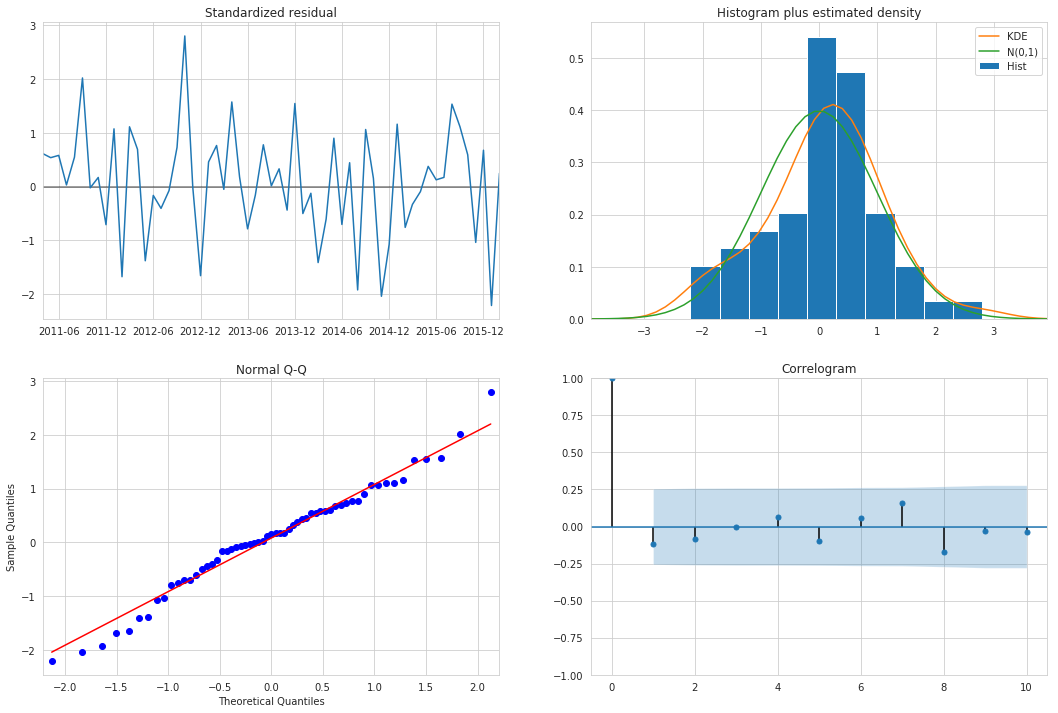

In [20]:
results.plot_diagnostics(figsize=(18, 12))
plt.show()

### Validating Forecasts

In [21]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [22]:
#pred_ci['inv_transformed_low1'] = pt.inverse_transform(pred_ci.iloc[:, 0])
pred_ci['inv_transformed_low'] = pt.inverse_transform(pred_ci[['lower revenue_transformed']])
pred_ci['inv_transformed_upper'] = pt.inverse_transform(pred_ci[['upper revenue_transformed']])

In [23]:
#Invert tranformed to scale-ack to original revenue scaling
pred_ci['predicted_mean'] = pred.predicted_mean
pred_ci['predicted_transformed_mean'] = pt.inverse_transform(pred_ci[['predicted_mean']])

In [24]:
pred_ci[:5]

lower revenue_transformed  upper revenue_transformed  \
2014-01-01                         -2                          3   
2014-02-01                         -1                          3   
2014-03-01                         -2                          3   
2014-04-01                         -2                          2   
2014-05-01                         -2                          3   

            inv_transformed_low  inv_transformed_upper  predicted_mean  \
2014-01-01             -725,933              2,372,898               0   
2014-02-01             -393,078              2,529,827               1   
2014-03-01             -809,604              2,290,203               0   
2014-04-01           -1,139,049              2,101,740               0   
2014-05-01             -440,368              2,490,384               1   

            predicted_transformed_mean  
2014-01-01                     991,569  
2014-02-01                   1,166,920  
2014-03-01                     925,547  
2014-04-01                     735,423  
2014-05-01                   1,133,245

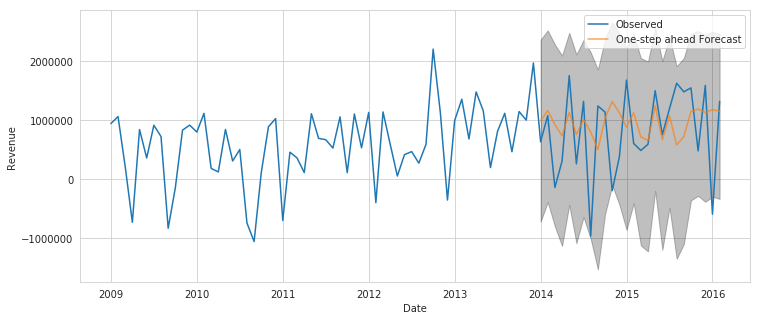

In [25]:
ax = df.Revenue['2009':].plot(label='Observed')
pred_ci['predicted_transformed_mean'].plot(ax=ax, label='One-step ahead Forecast', alpha=0.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 2],
                pred_ci.iloc[:, 3], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

In [26]:
df_forecasted = pred.predicted_mean
df_truth = df['revenue_transformed']['2014-01-01':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.35


---

#### Dynamic Parameter Selection for the ARIMA Time Series Model

In [27]:
#dynamic
pred_dynamic = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [28]:
#pred_ci['inv_transformed_low1'] = pt.inverse_transform(pred_ci.iloc[:, 0])
pred_dynamic_ci['inv_transformed_low'] = pt.inverse_transform(pred_dynamic_ci[['lower revenue_transformed']])
pred_dynamic_ci['inv_transformed_upper'] = pt.inverse_transform(pred_dynamic_ci[['upper revenue_transformed']])

In [29]:
#Invert tranformed to scale-ack to original revenue scaling
pred_dynamic_ci['predicted_mean'] = pred_dynamic.predicted_mean
pred_dynamic_ci['predicted_transformed_mean'] = pt.inverse_transform(pred_dynamic_ci[['predicted_mean']])

In [30]:
pred_dynamic_ci[:5]

lower revenue_transformed  upper revenue_transformed  \
2014-01-01                         -2                          3   
2014-02-01                         -1                          3   
2014-03-01                         -2                          3   
2014-04-01                         -2                          2   
2014-05-01                         -1                          3   

            inv_transformed_low  inv_transformed_upper  predicted_mean  \
2014-01-01             -725,933              2,372,898               0   
2014-02-01             -365,386              2,549,029               1   
2014-03-01             -776,743              2,316,804               0   
2014-04-01           -1,012,563              2,184,738               0   
2014-05-01             -281,517              2,596,856               1   

            predicted_transformed_mean  
2014-01-01                     991,569  
2014-02-01                   1,184,670  
2014-03-01                     948,485  
2014-04-01                     813,857  
2014-05-01                   1,233,242

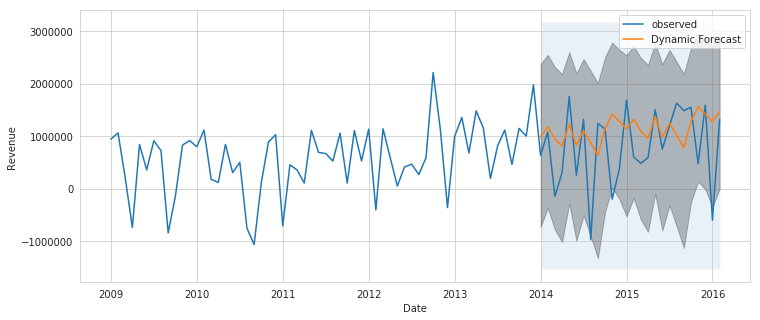

In [31]:
ax = df.Revenue['2009':].plot(label='observed')
pred_dynamic_ci['predicted_transformed_mean'].plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 2],
                pred_dynamic_ci.iloc[:, 3], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-01-01'), df.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')

plt.legend()
plt.show()

In [32]:
df_forecasted = pred_dynamic.predicted_mean
df_truth = df['revenue_transformed']['2014-01-01':]

# Compute the mean square error
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.43


### Producing and Visualizing Forecasts

In [33]:
# Get forecast 500 steps ahead in future
#pred_uc = results.get_forecast(steps=500)
pred_forecast = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
#pred_ci = pred_uc.conf_int()
pred_ci_forecast = pred_forecast.conf_int()

In [34]:
#pred_ci['inv_transformed_low1'] = pt.inverse_transform(pred_ci.iloc[:, 0])
pred_ci_forecast['inv_transformed_low'] = pt.inverse_transform(pred_ci_forecast[['lower revenue_transformed']])
pred_ci_forecast['inv_transformed_upper'] = pt.inverse_transform(pred_ci_forecast[['upper revenue_transformed']])

In [35]:
#Invert Transfomed to scale
pred_ci_forecast['predicted_mean'] = pred_forecast.predicted_mean
pred_ci_forecast['predicted_transformed_mean'] = pt.inverse_transform(pred_ci_forecast[['predicted_mean']])

In [36]:
pred_ci_forecast[:5]

lower revenue_transformed  upper revenue_transformed  \
2016-03-01                         -2                          2   
2016-04-01                         -2                          2   
2016-05-01                         -1                          3   
2016-06-01                         -2                          2   
2016-07-01                         -1                          3   

            inv_transformed_low  inv_transformed_upper  predicted_mean  \
2016-03-01             -933,979              2,131,570               0   
2016-04-01             -981,084              2,105,195               0   
2016-05-01               73,383              2,731,179               1   
2016-06-01             -934,578              2,131,234               0   
2016-07-01             -220,054              2,535,296               1   

            predicted_transformed_mean  
2016-03-01                     809,164  
2016-04-01                     782,256  
2016-05-01                   1,418,556  
2016-06-01                     808,823  
2016-07-01                   1,219,878

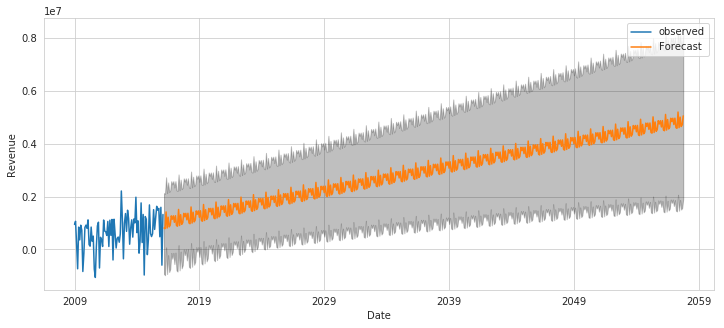

In [37]:
ax = df.Revenue.plot(label='observed')
pred_ci_forecast['predicted_transformed_mean'].plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_forecast.index,
                pred_ci_forecast.iloc[:, 2],
                pred_ci_forecast.iloc[:, 3], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')

plt.legend()
plt.show()